In [1]:
import featuretools as ft
import featuretools.variable_types as vtypes

import pandas as pd
import numpy as np

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

#import sklearn
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import(
    classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error
)


from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import (
    StandardScaler, LabelBinarizer, FunctionTransformer,PolynomialFeatures, OrdinalEncoder
)

from sklearn.feature_selection import (
    VarianceThreshold, SelectKBest, SelectPercentile, 
    SelectFromModel, f_regression, RFECV
)

from sklearn.impute import SimpleImputer
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import GridSearchCV

from sklearn.base import TransformerMixin, BaseEstimator

from sklearn.pipeline import Pipeline, FeatureUnion

In [2]:
# data = pd.read_csv('D:\\desktop files\\weka\\Files\\david_data_running.txt')
d2 = pd.read_csv('D:\\desktop files\\weka\\Files\\hartrainer\\accel\\data_12_accel_phone.txt')
d3 = pd.read_csv('D:\\desktop files\\weka\\Files\\hartrainer\\accel\\data_13_accel_phone.txt')
d4 = pd.read_csv('D:\\desktop files\\weka\\Files\\hartrainer\\accel\\data_14_accel_phone.txt')
d5 = pd.read_csv('D:\\desktop files\\weka\\Files\\hartrainer\\accel\\data_15_accel_phone.txt')
d6 = pd.read_csv('D:\\desktop files\\weka\\Files\\hartrainer\\accel\\data_16_accel_phone.txt')


In [3]:
d2.columns = ['subject','activity', 'TP','X','Y','Z']
d3.columns = ['subject','activity', 'TP','X','Y','Z']
d4.columns = ['subject','activity', 'TP','X','Y','Z']
d5.columns = ['subject','activity', 'TP','X','Y','Z']
d6.columns = ['subject','activity', 'TP','X','Y','Z']

In [4]:
dd = pd.concat([d2,d3,d4,d5,d6], axis=0)

In [5]:
dd.head()

,subject,activity,TP,X,Y,Z
0,12,Sitting,128345411474544,-0.781158,9.522522,1.245636;
1,12,Sitting,128345609594661,-0.621872,9.724716,1.1094055;
2,12,Sitting,128345411474544,-0.781158,9.522522,1.245636;
3,12,Sitting,128345609594661,-0.621872,9.724716,1.1094055;
4,12,Sitting,128345807714778,-0.682266,9.685150,0.97354126;


In [6]:
dd['activity'].value_counts()

Upstairs Walking      2682377
Running                183012
Sitting                 99341
Jogging                 81204
Downstairs Walking      74397
Sleeping                49438
Walking                    45
Name: activity, dtype: int64

In [7]:
dd.isnull().sum()

subject     0
activity    0
TP          0
X           0
Y           0
Z           0
dtype: int64

In [8]:
def make_pair_plot(df_corr):
    # Set the default matplotlib figure size to 7x7:
    fix, ax = plt.subplots(figsize=(5,5))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(df_corr, mask=mask, ax=ax, annot=True, cmap="BrBG")

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

### Split data

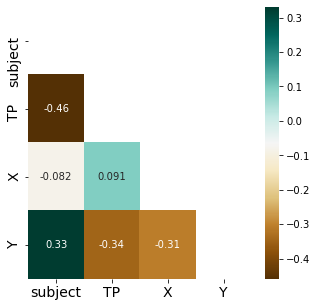

In [9]:
make_pair_plot(dd.corr())

In [10]:
df = dd.drop(['subject'], axis=1)

In [11]:
df.head()

,activity,TP,X,Y,Z
0,Sitting,128345411474544,-0.781158,9.522522,1.245636;
1,Sitting,128345609594661,-0.621872,9.724716,1.1094055;
2,Sitting,128345411474544,-0.781158,9.522522,1.245636;
3,Sitting,128345609594661,-0.621872,9.724716,1.1094055;
4,Sitting,128345807714778,-0.682266,9.685150,0.97354126;


In [12]:
# df["Z"] = pd.to_numeric(df["Z"], downcast="float")
df = df.replace({'Z': {';': ''}}, regex=True)
df["TP"] = pd.to_numeric(df["TP"], downcast="float")
df["X"] = pd.to_numeric(df["X"], downcast="float")
df["Y"] = pd.to_numeric(df["Y"], downcast="float")
df["Z"] = pd.to_numeric(df["Z"], downcast="float")
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169814 entries, 0 to 107744
Data columns (total 5 columns):
 #   Column    Dtype  
---  ------    -----  
 0   activity  object 
 1   TP        float32
 2   X         float32
 3   Y         float32
 4   Z         float32
dtypes: float32(4), object(1)
memory usage: 96.7+ MB


In [ ]:
df.index.name = 'id'
df.index.name

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:], df['activity'], random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((2377360, 5), (792454, 5), (2377360,), (792454,))

In [14]:
y_train.value_counts()

Upstairs Walking      2011820
Running                137175
Sitting                 74585
Jogging                 61076
Downstairs Walking      55698
Sleeping                36975
Walking                    31
Name: activity, dtype: int64

In [15]:
X_train.head()

,activity,TP,X,Y,Z
1784994,Upstairs Walking,1.593102e+14,7.824326,-3.800797,-0.695526
733889,Upstairs Walking,1.592754e+14,0.860794,2.512115,8.622711
1604075,Upstairs Walking,1.592973e+14,7.969772,-1.712448,1.544861
1482640,Upstairs Walking,1.592919e+14,12.357147,-8.950714,-2.097916
2461814,Upstairs Walking,1.592936e+14,12.951508,-9.536102,0.980423


In [16]:
degree = 2

mapper = DataFrameMapper([
(['TP','X','Y','Z'], [StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler()]),
], df_out=True)

poly_feature = mapper.fit_transform(X_train)

print(poly_feature)
# print(mapper.transformed_names_)

# poly_dm = pd.DataFrame(poly_feature, columns=mapper.transformed_names_)
# poly_dm.head()

         TP_X_Y_Z_0  TP_X_Y_Z_1  TP_X_Y_Z_2  TP_X_Y_Z_3
1784994    0.216054    0.769979   -0.550017   -0.863446
733889     0.214060   -0.247016    0.544269    0.999786
1604075    0.215317    0.791221   -0.188021   -0.415468
1482640    0.215010    1.431979   -1.442709   -1.143861
2461814    0.215105    1.518783   -1.544181   -0.528331
...             ...         ...         ...         ...
1545891    0.215724    0.762023   -0.843326   -0.436414
2209478    0.215541    0.568660   -0.653978   -1.102931
2082232    0.214502   -1.525909    0.344233    0.198625
2621455    0.214658   -1.525822   -0.816662   -0.102019
2072258    0.214747   -0.456727   -3.007933    1.993638

[2377360 rows x 4 columns]


In [17]:
pipe1a = Pipeline([
    ('map', mapper),
])

In [18]:
pipe1a = pipe1a.fit(X_train)
X_train = pipe1a.transform(X_train)
X_train_orig =X_train.copy()

#X_test = mapper.transform(X_test)
X_test =  pipe1a.transform(X_test)
X_test.head()
# save a copy of this dataframe for later reference
X_test_orig = X_test.copy()

In [19]:
X_train.head()


,TP_X_Y_Z_0,TP_X_Y_Z_1,TP_X_Y_Z_2,TP_X_Y_Z_3
1784994,0.216054,0.769979,-0.550017,-0.863446
733889,0.214060,-0.247016,0.544269,0.999786
1604075,0.215317,0.791221,-0.188021,-0.415468
1482640,0.215010,1.431979,-1.442709,-1.143861
2461814,0.215105,1.518783,-1.544181,-0.528331


In [20]:
def run_classification(trainx, testx):
    classifier =DecisionTreeClassifier(criterion='gini',max_depth=2, max_leaf_nodes=20)
    classifier.fit(trainx, y_train)
    Y_pred = classifier.predict(testx)
    print(f"Decision Tree Test score {classifier.score(testx, y_test)}")
    print(f"Decision Tree Confusion Matrix: \n {confusion_matrix(y_test, Y_pred)}")
#     feature_importances = classifier.feature_importances_
#     feature_importances     

    
#     lr=LogisticRegression(solver='lbfgs',max_iter=500)
#     lr = lr.fit(trainx, y_train)
#     print(f"LogisticRegression Test socre {lr.score(testx, y_test)}")
#     Y_pred2 = lr.predict(testx)
#     print(f"Logistic Regression Confusion Matix:\n {confusion_matrix(y_test, Y_pred2)}")
    
    
#     lr_weights = pd.DataFrame({
#         'features': testx.columns,
#         'importance': lr.coef_[0]
#     }) 
#     lr_weights.sort_values('importance', ascending=False, inplace=True)
#     print(f"LogisticRegression Top Feature Weights\n {lr_weights.head()}")


In [21]:
run_classification(X_train, X_test)

Decision Tree Test score 0.8850974315228392
Decision Tree Confusion Matrix: 
 [[     0      0  12453   5157      0   1089      0]
 [     0      0  16448   1367      0   2313      0]
 [     0      0  42694   1213      0   1930      0]
 [     0      0  17472   7284      0      0      0]
 [     0      0      0   4224      0   8239      0]
 [     0      0  19136      0      0 651421      0]
 [     0      0     11      0      0      3      0]]


In [24]:
df.head()

,activity,TP,X,Y,Z
0,Sitting,1.283454e+14,-0.781158,9.522522,1.245636
1,Sitting,1.283456e+14,-0.621872,9.724716,1.109406
2,Sitting,1.283454e+14,-0.781158,9.522522,1.245636
3,Sitting,1.283456e+14,-0.621872,9.724716,1.109406
4,Sitting,1.283458e+14,-0.682266,9.685150,0.973541


In [26]:
df.index.name = 'id'
df.index.name

In [28]:
df.head()

,activity,TP,X,Y,Z
id,,,,,
0,Sitting,1.283454e+14,-0.781158,9.522522,1.245636
1,Sitting,1.283456e+14,-0.621872,9.724716,1.109406
2,Sitting,1.283454e+14,-0.781158,9.522522,1.245636
3,Sitting,1.283456e+14,-0.621872,9.724716,1.109406
4,Sitting,1.283458e+14,-0.682266,9.685150,0.973541


#### Feature Tools
Let's see what Primitives are available out of the box

In [22]:
primitives = ft.list_primitives()
pd.options.display.max_colwidth = 100
primitives[primitives['type'] == 'aggregation'].head(primitives[primitives['type'] == 'aggregation'].shape[0])

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
0,std,aggregation,True,True,"Computes the dispersion relative to the mean value, ignoring `NaN`.",Numeric,Numeric
1,min,aggregation,True,True,"Calculates the smallest value, ignoring `NaN` values.",Numeric,Numeric
2,mean,aggregation,True,True,Computes the average for a list of values.,Numeric,Numeric
3,time_since_first,aggregation,False,False,Calculates the time elapsed since the first datetime (in seconds).,DatetimeTimeIndex,Numeric
4,all,aggregation,True,False,Calculates if all values are 'True' in a list.,Boolean,Boolean
5,last,aggregation,False,False,Determines the last value in a list.,Variable,None
6,skew,aggregation,False,False,Computes the extent to which a distribution differs from a normal distribution.,Numeric,Numeric
7,n_most_common,aggregation,False,False,Determines the `n` most common elements.,Discrete,Discrete
8,num_true,aggregation,True,False,Counts the number of `True` values.,Boolean,Numeric
9,num_unique,aggregation,True,True,"Determines the number of distinct values, ignoring `NaN` values.",Discrete,Numeric


In [23]:
primitives[primitives['type'] == 'transform'].head(primitives[primitives['type'] == 'transform'].shape[0])

,name,type,dask_compatible,koalas_compatible,description,valid_inputs,return_type
22,time_since_previous,transform,False,False,Compute the time since the previous entry in a list.,DatetimeTimeIndex,Numeric
23,cum_count,transform,False,False,Calculates the cumulative count.,"Id, Discrete",Numeric
24,year,transform,True,True,Determines the year value of a datetime.,Datetime,Ordinal
25,greater_than_equal_to,transform,True,True,Determines if values in one list are greater than or equal to another list.,"Datetime, Ordinal, Numeric",Boolean
26,time_since,transform,True,False,Calculates time from a value to a specified cutoff datetime.,Datetime,Numeric
27,day,transform,True,True,Determines the day of the month from a datetime.,Datetime,Ordinal
28,cum_max,transform,False,False,Calculates the cumulative maximum.,Numeric,Numeric
29,less_than_equal_to,transform,True,True,Determines if values in one list are less than or equal to another list.,"Datetime, Ordinal, Numeric",Boolean
30,less_than_equal_to_scalar,transform,True,True,Determines if values are less than or equal to a given scalar.,"Datetime, Ordinal, Numeric",Boolean
31,num_characters,transform,True,True,Calculates the number of characters in a string.,NaturalLanguage,Numeric


#### Experiment 1 - set up entity and EntitySet
FeatureTools requires you to set up an overall EntitySet and then add Entities to it. Entities can be thought of as tables in a relational database (i.e. Product, Sales and Customer) or separate dataframes in Python than you are linking together. For the Titanic dataset, I named the EntitySet "Survivors" and added my X_train dataframe as the Passengers entity (using the entity_from_dataframe() function)

In [29]:
# creating and entity set 'es'
es = ft.EntitySet(id = 'har_dataset')

# adding a dataframe 
es.entity_from_dataframe(entity_id = 'har_data', dataframe = X_train, index = 'id')

C:\Program Data\envs\Tensorflow\lib\site-packages\featuretools\entityset\entity.py:463: UserWarning: index id not found in dataframe, creating new integer column
  "integer column".format(index))


Entityset: har_dataset
  Entities:
    har_data [Rows: 2377360, Columns: 5]
  Relationships:
    No relationships

#### Check the Variables 
* we can check the variables that it has learned and can see that it is treating everything as numeric, when really several of them are categorical.  
* so we will be more explicit when creating our entity

In [30]:
es["har_data"].variables

[<Variable: id (dtype = index)>,
 <Variable: TP_X_Y_Z_0 (dtype = numeric)>,
 <Variable: TP_X_Y_Z_1 (dtype = numeric)>,
 <Variable: TP_X_Y_Z_2 (dtype = numeric)>,
 <Variable: TP_X_Y_Z_3 (dtype = numeric)>]

In [36]:

variable_types = { 'id': vtypes.Categorical,
      'TP_X_Y_Z_0': vtypes.Categorical,
      'TP_X_Y_Z_1': vtypes.Categorical,
      'TP_X_Y_Z_2': vtypes.Categorical,
        'TP_X_Y_Z_3': vtypes.Categorical}
#     ignore_variables={'har_data':['id']})

es.entity_from_dataframe(entity_id = 'har_data', dataframe = X_train, index = 'id', variable_types=variable_types)

Entityset: har_dataset
  Entities:
    har_data [Rows: 2377360, Columns: 5]
    data_har [Rows: 2377360, Columns: 5]
  Relationships:
    No relationships

In [37]:
es["har_data"].variables

[<Variable: id (dtype = index)>,
 <Variable: TP_X_Y_Z_0 (dtype = categorical)>,
 <Variable: TP_X_Y_Z_1 (dtype = categorical)>,
 <Variable: TP_X_Y_Z_2 (dtype = categorical)>,
 <Variable: TP_X_Y_Z_3 (dtype = categorical)>]

#### Now FeatureTools recognizes those columns as being categorical. Let's try generating some features!¶
* We call the Deep Feature Synthesis, dfs(), function, telling it what entity to target (Passengers is our only entity in this case) and how deep to go in stacking depth (

In [38]:
feature_matrix, feature_names = ft.dfs(entityset=es, 
    target_entity = 'har_data', 
    max_depth = 3, 
    verbose = 3, 
    n_jobs = 1)

Built 4 features
Elapsed: 00:49 | Progress: 100%|███████████████████████████████████████████████████████████████████████████████████████


#### Result -- no new columns generated!¶
* if we don't have any obvious relationships, we need to create some

In [41]:
feature_names

[<Feature: TP_X_Y_Z_0>,
 <Feature: TP_X_Y_Z_1>,
 <Feature: TP_X_Y_Z_2>,
 <Feature: TP_X_Y_Z_3>]

In [44]:
X_train=feature_matrix.copy() # save the generated features back into our X_Train
feature_matrix.head().T

id,0,1,2,3,4
TP_X_Y_Z_0,0.216054,0.214060,0.215317,0.215010,0.215105
TP_X_Y_Z_1,0.769979,-0.247016,0.791221,1.431979,1.518783
TP_X_Y_Z_2,-0.550017,0.544269,-0.188021,-1.442709,-1.544181
TP_X_Y_Z_3,-0.863446,0.999786,-0.415468,-1.143861,-0.528331


#### Great! Now we have some features. Let's take a closer look at a few of them
* Pclass.SUM(Passengers.family_count) = for all passengers with PClass=3, sum up the family_count

In [ ]:
# X_train[X_train['activity']==3]['family_count'].sum(), X_train[X_train['Pclass']==1]['family_count'].sum()

In [ ]:
# X_train[X_train['Pclass']==3]['family_count'].mean(), X_train[X_train['Pclass']==1]['family_count'].mean()

#### Apply to test set
* recommended approach from FeatureLabs on StackOverflow is to encode the features of our training set and then use those saved features to apply to our test set (https://stackoverflow.com/questions/49711987/how-do-i-prevent-data-leakage-with-featuretools)

In [45]:
X_train.shape, X_test.shape

((2377360, 4), (792454, 4))

In [46]:
feature_matrix_enc, features_enc = ft.encode_features(feature_matrix, feature_names, include_unknown=False)

In [47]:
feature_matrix_enc.head()

,TP_X_Y_Z_0 = 0.21403302252292633,TP_X_Y_Z_0 = 0.21404358744621277,TP_X_Y_Z_0 = 0.21404743194580078,TP_X_Y_Z_0 = 0.21403686702251434,TP_X_Y_Z_0 = 0.2140791118144989,TP_X_Y_Z_0 = 0.21406279504299164,TP_X_Y_Z_0 = 0.21404454112052917,TP_X_Y_Z_0 = 0.21404069662094116,TP_X_Y_Z_0 = 0.21406854689121246,TP_X_Y_Z_0 = 0.21406662464141846,...,TP_X_Y_Z_3 = 3.2334375381469727,TP_X_Y_Z_3 = -4.610013484954834,TP_X_Y_Z_3 = 1.0967313051223755,TP_X_Y_Z_3 = 1.1402946710586548,TP_X_Y_Z_3 = 0.9685494303703308,TP_X_Y_Z_3 = 1.1560931205749512,TP_X_Y_Z_3 = 1.1304823160171509,TP_X_Y_Z_3 = 1.1773957014083862,TP_X_Y_Z_3 = 1.1188730001449585,TP_X_Y_Z_3 = 0.9833899140357971
id,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
features_enc

[<Feature: TP_X_Y_Z_0 = 0.21403302252292633>,
 <Feature: TP_X_Y_Z_0 = 0.21404358744621277>,
 <Feature: TP_X_Y_Z_0 = 0.21404743194580078>,
 <Feature: TP_X_Y_Z_0 = 0.21403686702251434>,
 <Feature: TP_X_Y_Z_0 = 0.2140791118144989>,
 <Feature: TP_X_Y_Z_0 = 0.21406279504299164>,
 <Feature: TP_X_Y_Z_0 = 0.21404454112052917>,
 <Feature: TP_X_Y_Z_0 = 0.21404069662094116>,
 <Feature: TP_X_Y_Z_0 = 0.21406854689121246>,
 <Feature: TP_X_Y_Z_0 = 0.21406662464141846>,
 <Feature: TP_X_Y_Z_1 = 2.4616494178771973>,
 <Feature: TP_X_Y_Z_1 = -3.2671453952789307>,
 <Feature: TP_X_Y_Z_1 = -0.17813339829444885>,
 <Feature: TP_X_Y_Z_1 = 0.11934233456850052>,
 <Feature: TP_X_Y_Z_1 = 0.05552971735596657>,
 <Feature: TP_X_Y_Z_1 = -0.04132683947682381>,
 <Feature: TP_X_Y_Z_1 = 0.1133989691734314>,
 <Feature: TP_X_Y_Z_1 = -0.3689606785774231>,
 <Feature: TP_X_Y_Z_1 = 0.12082873284816742>,
 <Feature: TP_X_Y_Z_1 = -0.365640252828598>,
 <Feature: TP_X_Y_Z_2 = -3.3043551445007324>,
 <Feature: TP_X_Y_Z_2 = 0.3677861094

In [49]:
X_train = feature_matrix_enc.copy()
X_train.shape

(2377360, 40)

Now create a new entity set for test and repeat the steps for adding the Passengers and PClass entities

In [51]:
# creating and entity set 'es'
es_tst = ft.EntitySet(id = 'har_dataset_test')
# adding a dataframe 
es_tst.entity_from_dataframe(entity_id = 'har_data', dataframe = X_test, index = 'id')
# add PCLass entity
es_tst = es_tst.normalize_entity(base_entity_id='har_data', new_entity_id='TP_X_Y_Z_0', index='TP_X_Y_Z_0')

In [52]:
es_tst

Entityset: har_dataset_test
  Entities:
    har_data [Rows: 792454, Columns: 5]
    TP_X_Y_Z_0 [Rows: 7033, Columns: 1]
  Relationships:
    har_data.TP_X_Y_Z_0 -> TP_X_Y_Z_0.TP_X_Y_Z_0

Now call calculate_feature_matrix on our test entity set and pass in the list of saved features from training¶

In [53]:
feature_matrix_tst = ft.calculate_feature_matrix(features=features_enc, entityset=es_tst)
X_test = feature_matrix_tst.copy()
X_test.head()

,TP_X_Y_Z_0 = 0.21403302252292633,TP_X_Y_Z_0 = 0.21404358744621277,TP_X_Y_Z_0 = 0.21404743194580078,TP_X_Y_Z_0 = 0.21403686702251434,TP_X_Y_Z_0 = 0.2140791118144989,TP_X_Y_Z_0 = 0.21406279504299164,TP_X_Y_Z_0 = 0.21404454112052917,TP_X_Y_Z_0 = 0.21404069662094116,TP_X_Y_Z_0 = 0.21406854689121246,TP_X_Y_Z_0 = 0.21406662464141846,...,TP_X_Y_Z_3 = 3.2334375381469727,TP_X_Y_Z_3 = -4.610013484954834,TP_X_Y_Z_3 = 1.0967313051223755,TP_X_Y_Z_3 = 1.1402946710586548,TP_X_Y_Z_3 = 0.9685494303703308,TP_X_Y_Z_3 = 1.1560931205749512,TP_X_Y_Z_3 = 1.1304823160171509,TP_X_Y_Z_3 = 1.1773957014083862,TP_X_Y_Z_3 = 1.1188730001449585,TP_X_Y_Z_3 = 0.9833899140357971
id,,,,,,,,,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
X_train.shape, X_test.shape

((2377360, 40), (792454, 40))

### Lesson -- output can contain nulls, so need to trim

In [55]:
# double check for nulls
for col in X_train.columns:
    if X_train[col].isnull().sum() >0:
        print(col)
        X_train.drop(col, axis=1, inplace=True)

Try Classification model¶

In [57]:
run_classification(X_train, X_test)

Decision Tree Test score 0.846177822308929
Decision Tree Confusion Matrix: 
 [[     0      0      0      0      0  18699      0]
 [     0      0      0      0      0  20128      0]
 [     0      0      0      0      0  45837      0]
 [     0      0      0      0      0  24756      0]
 [     0      0      0      0      0  12463      0]
 [     0      0      0      0      0 670557      0]
 [     0      0      0      0      0     14      0]]


### Result = Bad!
* not only is the accuracy score worse than before we added any new Features, but the Confusion Matrix shows that that the model is now just predicting that everyone dies
* clearly something is going wrong...

### Try Removing highly correlated features?
* maybe we have too many correlated features?  Let's try stripping some out (thanks to https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/)

In [61]:
# Threshold for removing correlated variables
threshold = 0.5

# Absolute value correlation matrix
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,TP_X_Y_Z_0 = 0.21403302252292633,TP_X_Y_Z_0 = 0.21404358744621277,TP_X_Y_Z_0 = 0.21404743194580078,TP_X_Y_Z_0 = 0.21403686702251434,TP_X_Y_Z_0 = 0.2140791118144989,TP_X_Y_Z_0 = 0.21406279504299164,TP_X_Y_Z_0 = 0.21404454112052917,TP_X_Y_Z_0 = 0.21404069662094116,TP_X_Y_Z_0 = 0.21406854689121246,TP_X_Y_Z_0 = 0.21406662464141846,...,TP_X_Y_Z_3 = 3.2334375381469727,TP_X_Y_Z_3 = -4.610013484954834,TP_X_Y_Z_3 = 1.0967313051223755,TP_X_Y_Z_3 = 1.1402946710586548,TP_X_Y_Z_3 = 0.9685494303703308,TP_X_Y_Z_3 = 1.1560931205749512,TP_X_Y_Z_3 = 1.1304823160171509,TP_X_Y_Z_3 = 1.1773957014083862,TP_X_Y_Z_3 = 1.1188730001449585,TP_X_Y_Z_3 = 0.9833899140357971
TP_X_Y_Z_0 = 0.21403302252292633,NaN,0.000735,0.000735,0.000735,0.000734,0.000734,0.000734,0.000734,0.000733,0.000732,...,0.001529,0.001225,0.001024,0.001021,0.001021,0.001019,0.001015,0.001014,0.001012,0.001005
TP_X_Y_Z_0 = 0.21404358744621277,NaN,NaN,0.000732,0.000732,0.000732,0.000732,0.000732,0.000732,0.000731,0.000730,...,0.001525,0.001221,0.001021,0.001018,0.001018,0.001016,0.001012,0.001011,0.001009,0.001002
TP_X_Y_Z_0 = 0.21404743194580078,NaN,NaN,NaN,0.000732,0.000731,0.000731,0.000731,0.000731,0.000730,0.000729,...,0.001523,0.001220,0.001020,0.001017,0.001017,0.001015,0.001011,0.001010,0.001008,0.001001
TP_X_Y_Z_0 = 0.21403686702251434,NaN,NaN,NaN,NaN,0.000731,0.000731,0.000731,0.000731,0.000730,0.000729,...,0.001523,0.001220,0.001020,0.001017,0.001017,0.001015,0.001011,0.001010,0.001008,0.001001
TP_X_Y_Z_0 = 0.2140791118144989,NaN,NaN,NaN,NaN,NaN,0.000731,0.000731,0.000730,0.000730,0.000728,...,0.001522,0.001219,0.001019,0.001017,0.001017,0.001015,0.001010,0.001009,0.001007,0.001001


In [62]:
# Select columns with correlations above threshold
collinear_features = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d features to remove.' % (len(collinear_features)))

There are 2 features to remove.


In [63]:
X_train_flt = X_train.drop(columns = collinear_features)
X_test_flt = X_test.drop(columns = collinear_features)
X_train_flt.shape, X_test_flt.shape


((2377360, 38), (792454, 38))